<a href="https://colab.research.google.com/github/Liburn-Krasniqi/Tweet-Sentiment-Analysis/blob/main/Project_B_ICT_AI_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Description**

- The problem is to determine whether a given Tweet has a positive or negative sentiment.

- First, we need to perform data cleaning by removing punctuation, removing **[stop words](https://en.wikipedia.org/wiki/Stop_word)** and performing **[stemming](https://en.wikipedia.org/wiki/Stemming)**.

-  Next, we will split the dataset between training and testing.

Finally, we will have to classify correctly the tweets of the testing set in either **positive** or **negative**.


---


##  **Deliverables**
- **Python Code**   
- **Experimental Analysis**  
  - Compare different models and methods to assess estimation accuracy.  
- **Short Report (≈10 pages)**  
  - **Approach**: Explanation of methodology and modeling techniques.  
  - **Code Overview**: Summary of key functions and logic.  

---

### Articles that helped me on this:


*   [Data Quality Explored](https://www3.tuhh.de/sts/hoou/data-quality-explored/3-1-sentiment-analysis.html)
*   [Emojis Aid Social Media Sentiment Analysis: Stop Cleaning Them Out!](https://towardsdatascience.com/emojis-aid-social-media-sentiment-analysis-stop-cleaning-them-out-bb32a1e5fc8e/#1c64)
*   [Emoticons](https://en.wikipedia.org/wiki/Emoticon)
*   [Lemmatization with NLTK](https://www.geeksforgeeks.org/python-lemmatization-with-nltk/)
*    And the Materials and Lectures provided by professor Liagkouras



# 1. Importing all libraries and Loading dataset:

In [46]:
pip install emoji --upgrade

In [47]:
import re
import emoji
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Model
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

# Language
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import twitter_samples, stopwords
from nltk.tokenize import RegexpTokenizer, TweetTokenizer

In [48]:
# Download the twitter samples if not already downloaded
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('twitter_samples')

# Get the positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# Create DataFrames for positive and negative tweets
df_positive = pd.DataFrame({'tweet': all_positive_tweets, 'label': 1})
df_negative = pd.DataFrame({'tweet': all_negative_tweets, 'label': 0})

# Combine them into one DataFrame
df = pd.concat([df_positive, df_negative], ignore_index=True)

# Shuffle the DataFrame to mix positive and negative tweets
df = df.sample(frac=1, random_state=42).reset_index(drop=True) # 42 to make results reproducible :)

pd.set_option('max_colwidth', 100) # So we can see some longer tweets

# Display the last 50 rows (the last ones are more diverse in content)
df.tail(50)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


,tweet,label
9950,:( why am I not asleep,0
9951,@tbhnswm wayhh :(,0
9952,can I use anyones netflix my account is inactive and I wanna watch orphan black :(((,0
9953,Jahat :(,0
9954,@genrentuk with landlords like @RichardBenyonMP as MP's though that's not going to be easy? :-(,0
9955,@jaidevpoomath don't have the app :(,0
9956,@86_Siwonie thank you oppa :),1
9957,@CHONIM91 btw ini sore say :(,0
9958,sorry minkyuk I'm a slow af : (,0
9959,in the getaway car after committing some criminal act !!! :( http://t.co/bmp14zzHLu http://t.co/...,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   10000 non-null  object
 1   label   10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [50]:
df["tweet"] = df["tweet"].astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   10000 non-null  string
 1   label   10000 non-null  int64 
dtypes: int64(1), string(1)
memory usage: 156.4 KB


# 2. Data Cleaning:
 - Remove Punctuantion
 - Remove Stop Words and Other similar things
 - Stemming or Lemmiaization

In [51]:
tokenizer = RegexpTokenizer(r'\w+') # Regex that matches any word

# Save list of words that are considered to have no sentimental value
en_stopwords = set(stopwords.words('english'))

# Thing that stems words
ps = PorterStemmer()

In [52]:
def getCleanedText(text):
  text = text.lower()  # Lowercase
  text = re.sub(r'@[^ ]+', '', text)  # Remove usernames, that means anything with the '@' prefix
  text = re.sub(r'https?://[^ ]+', '', text)  # Remove URLs
  text = re.sub(r'([A-Za-z])\1{2,}', r'\1', text)  # Character Normalization (e.g. Turning 'loooooove' into 'love')
  text = re.sub(r' 0 ', 'zero', text)  # Keep 0 but as a word 'zero' that carries negative sentiment
  text = re.sub(r'[^A-Za-z ]', '', text)  # Remove Punctuation, Emojis, etc.

  # Tokenize
  tokens=tokenizer.tokenize(text)
  # Remove tokens for "Stop words"
  new_tokens=[token for token in tokens if token not in en_stopwords]
  # Stemming
  stemmed_tokens=[ps.stem(tokens) for tokens in new_tokens]
  # Return a string of cleaned tokens
  clean_text=" ".join(stemmed_tokens)

  return clean_text

In [53]:
# Feature
X = df['tweet']

# Dependent variable
y = df['label']

In [54]:
# Apply cleaning
X_cleaned = [getCleanedText(text) for text in X]

In [ ]:
print("Cleaned Text: \n")
count = 0
for t in X_cleaned[:10]:
  count+=1
  print(f"{count}. {t}")

Cleaned Text: 

1. love feel emm think
2. thank guy
3. love lord better life lt
4. yeah better use offici account like
5. ok good night wish troy wasnt ugli met today ok today fun im excit tmrw
6. im surpris sound hellish would thing
7. dri hot scorch summer ff
8. sad pray
9. popol day
10. song week ducktail surreal exposur sotw jingli jangli loveli


# 3. Split into training and testing:

In [55]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.3, random_state=42)

In [56]:
cv = CountVectorizer(ngram_range=(1,2), min_df = 2)
X_vect_train = cv.fit_transform(X_train).toarray()
print(cv.get_feature_names_out())

['aah' 'ab' 'abandon' ... 'zoe' 'zonzofox' 'zonzofox click']


In [57]:
X_vect_test=cv.transform(X_test).toarray()

# 4. Training model(s):
We'll try out multiple configurations and models, but i am quite certain that **SVM** is a good technique for this problem.

## 4.1. MLB

In [ ]:
mlb=MultinomialNB()
mlb.fit(X_vect_train,y_train)

MultinomialNB()

In [ ]:
prediction = mlb.predict(X_vect_test)

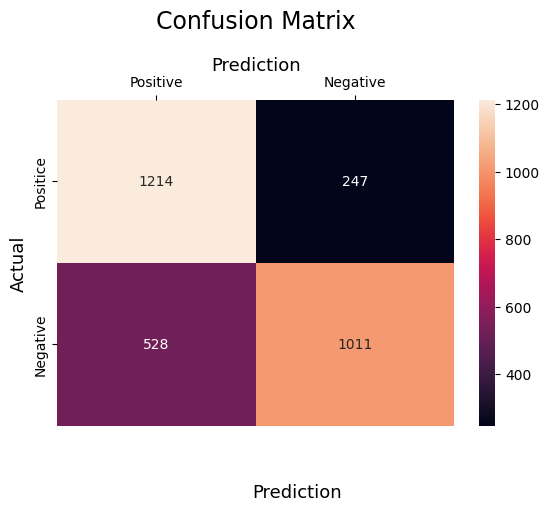

In [ ]:
cm = confusion_matrix(y_test,prediction)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negative'],
            yticklabels=['Positice','Negative'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy:.4f}%")
print(classification_report(y_test, prediction))

Accuracy: 0.7417%
              precision    recall  f1-score   support

           0       0.70      0.83      0.76      1461
           1       0.80      0.66      0.72      1539

    accuracy                           0.74      3000
   macro avg       0.75      0.74      0.74      3000
weighted avg       0.75      0.74      0.74      3000



## 4.2. SVM

In [ ]:
clf = svm.SVC()
clf.fit(X_vect_train,y_train)

SVC()

In [ ]:
svm_prediction = clf.predict(X_vect_test)

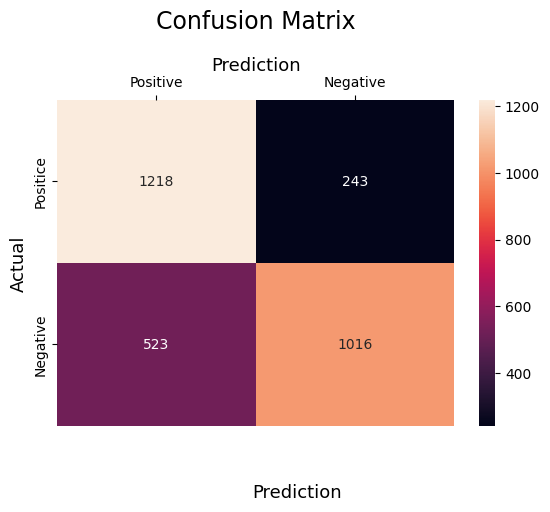

In [ ]:
cm = confusion_matrix(y_test,svm_prediction)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negative'],
            yticklabels=['Positice','Negative'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, svm_prediction)
print(f"Accuracy: {accuracy:.4f}%")
print(classification_report(y_test, svm_prediction))

Accuracy: 0.7447%
              precision    recall  f1-score   support

           0       0.70      0.83      0.76      1461
           1       0.81      0.66      0.73      1539

    accuracy                           0.74      3000
   macro avg       0.75      0.75      0.74      3000
weighted avg       0.75      0.74      0.74      3000



We can see that the prediction model did not improve the results with any significance, 74% accuracy isnt bad but it definetly isnt outstanding.

### Lets return to cleaning data again because i have some ideas.

In [6]:
# Lets use lemmatizer since porter stemmer is too agressive (e.g. turns University into Universe)
lemmatizer = WordNetLemmatizer()

en_stopwords = set(stopwords.words('english'))

# And lets also use tweet tokenizer since its better at tokenizing informal language (that is mainly used in tweets)
tokenizer = TweetTokenizer()

In [7]:
def getCleanedText(text):
  text = text.lower()  # Lowercase
  text = re.sub(r'@[^ ]+', '', text)  # Remove usernames, that means anything with the '@' prefix
  text = re.sub(r'https?://[^ ]+', '', text)  # Remove URLs
  text = re.sub(r'([A-Za-z])\1{2,}', r'\1', text)  # Character Normalization (e.g. Turning 'loooooove' into 'love')
  text = re.sub(r' 0 ', 'zero', text)  # Keep 0 but as a word 'zero' that carries negative sentiment
  text = re.sub(r'[^A-Za-z ]', '', text)  # Remove Punctuation, Emojis, etc.

  # Tokenize
  tokens=tokenizer.tokenize(text)
  # Remove tokens for "Stop words"
  new_tokens=[token for token in tokens if token not in en_stopwords]
  # Stemming
  lemmed_tokens=[lemmatizer.lemmatize(tokens) for tokens in new_tokens]
  # Return a string of cleaned tokens
  clean_text=" ".join(lemmed_tokens)

  return clean_text

In [10]:
# Apply cleaning
X_cleaned = [getCleanedText(text) for text in X]

In [16]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.3, random_state=42)

In [ ]:
cv = CountVectorizer(ngram_range=(1,2), min_df = 2)
X_vect_train = cv.fit_transform(X_train).toarray()
print(cv.get_feature_names_out())

In [21]:
X_vect_test=cv.transform(X_test).toarray()

In [26]:
clf = svm.SVC()
clf.fit(X_vect_train,y_train)

SVC()

In [27]:
svm_prediction = clf.predict(X_vect_test)

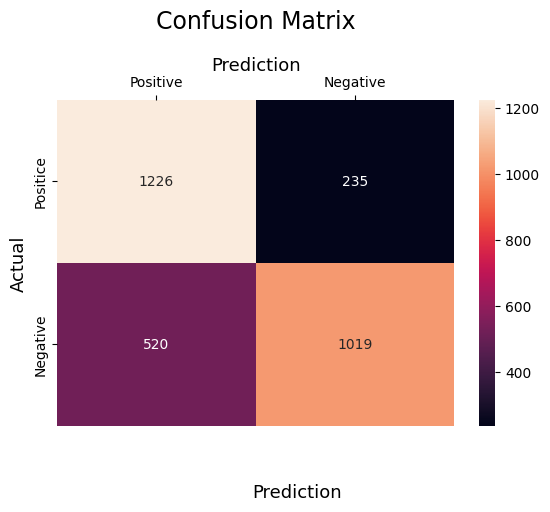

Accuracy: 0.7483%
              precision    recall  f1-score   support

           0       0.70      0.84      0.76      1461
           1       0.81      0.66      0.73      1539

    accuracy                           0.75      3000
   macro avg       0.76      0.75      0.75      3000
weighted avg       0.76      0.75      0.75      3000



In [29]:
cm = confusion_matrix(y_test,svm_prediction)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negative'],
            yticklabels=['Positice','Negative'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()
accuracy = accuracy_score(y_test, svm_prediction)
print(f"Accuracy: {accuracy:.4f}%")
print(classification_report(y_test, svm_prediction))

# Emojis and emoticons
Since we already mentioned that tweets are quite informal, lets keep the emojis which can very much be used to carry polar sentiment

In [32]:
# By inspecting the data you can see that almost all of the tweets have emoticons and emojis
df.tail(18)

,tweet,label
9982,"Telling people at KFC to go buy ""she's kinda hot"" on iTunes :))) #dedicatedfan\n@5SOS 💜💜💜💜",1
9983,@5sos_solo PLEASE PICK ME IF U WANT MAKE ME HAPPY BC TODAY I'M SICK :(,0
9984,@brittleyouth @Tom_J_Allen @AndrewFairbairn @batemanesque @Hegelbon @jameswheeler that was the w...,0
9985,@baileymac02 miss you :(,0
9986,"@oconnor_max YAY! Can't wait! Hope I can keep up - been swimming more than riding recently, but ...",1
9987,@harryetlou i feel so bad for her LMAO ohhh i wanna know how it felt to be louis the first time ...,0
9988,"Thank you :) ""@Clicks_SA: Tweenie_Fox Hi, please click here for a list of our hair accessories &...",1
9989,CURRENT MOOD AF :-) http://t.co/TYzKvdkHqM,1
9990,Someone please gift me #NotAnApology :(,0
9991,Cutest dance ever :((,0


In [33]:
X = df['tweet']
y = df['label']

In [34]:
emoticon_map = {
    r':\)': 'smile',
    r':\(': 'frown',
    r':-\(': 'frown',
    r'<3': 'heart',
}

In [35]:
def getCleanedText(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'@[^ ]+', '', text)  # Remove usernames
    text = re.sub(r'https?://[^ ]+', '', text)  # Remove URLs
    text = re.sub(r'([A-Za-z])\1{2,}', r'\1', text)  # Normalize characters
    text = re.sub(r' 0 ', 'zero', text)  # Keep "0" as "zero" (validate if needed)

    # main emoticons
    for pattern, replacement in emoticon_map.items():
      text = re.sub(pattern, replacement, text)

    # Convert emojis to text tokens (e.g., 😊 → :smile:)
    text = emoji.demojize(text, delimiters=(':', ':'))

    # Remove punctuation except for emoji placeholders
    text = re.sub(r'[^\w\s:]', '', text)  # Keep letters, spaces, and colons for emojis

    # Tokenize with TweetTokenizer
    tokens = tokenizer.tokenize(text)

    # Remove stop words
    new_tokens = [token for token in tokens if token not in en_stopwords]

    # Lemmatizing (instead of stemming, because its too agressive)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in new_tokens]

    # Join tokens
    clean_text = " ".join(lemmatized_tokens)

    return clean_text

In [36]:
# Apply cleaning
X_cleaned = [getCleanedText(text) for text in X]

In [37]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.3, random_state=42)

In [39]:
# Vectorize (this time with TF-IDF)
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X_vect_train = tfidf.fit_transform(X_train)
X_vect_test = tfidf.transform(X_test)

In [41]:
# Train and fine-tune SVM (this is a much better and optimized way)
svm = LinearSVC(class_weight='balanced')
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid.fit(X_vect_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5, estimator=LinearSVC(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

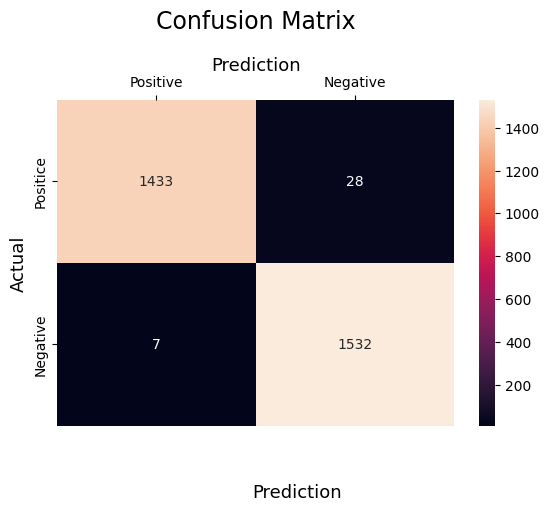

Accuracy: 0.9883%
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1461
           1       0.98      1.00      0.99      1539

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [43]:
# Predict and evaluate
svm_best = grid.best_estimator_
svm_prediction = svm_best.predict(X_vect_test)
accuracy = accuracy_score(y_test, svm_prediction)

cm = confusion_matrix(y_test,svm_prediction)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negative'],
            yticklabels=['Positice','Negative'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()
print(f"Accuracy: {accuracy:.4f}%")
print(classification_report(y_test, svm_prediction))

As you can see keeping the emojis and emoticons helped us a great deal in this model by boosting accuracy over **20%**!